# Data preparation
---
#### Trying Pydicom

In [2]:
%matplotlib inline
import numpy as np
import os
import matplotlib as mpl
import matplotlib.pyplot as plt
import pydicom as dicom
from pydicom.data import get_testdata_files
import random

In [76]:
dataset = 'dataset/'
foldernames = os.listdir(dataset)
foldernames.remove('.DS_Store')


In [83]:
def getDicomArray(refDs, lstFiles):
    ConstPixelDims = (len(lstFiles), int(refDs.Rows), int(refDs.Columns))
    ConstPixelSpacing = (float(refDs.PixelSpacing[0]), float(refDs.PixelSpacing[1]), float(refDs.SliceThickness))
    PixelDict = {}
    PixelDict['ids'] = []
    ArrayDicom = np.zeros(ConstPixelDims, dtype=refDs.pixel_array.dtype)
    # loop through all the DICOM files
    for filenameDCM in lstFiles:
        # read the file
        ds = dicom.read_file(filenameDCM)
        key = str(ds.pixel_array.shape)
        if len(PixelDict.keys()) == 1:
            PixelDict[key] = np.asarray([ds.pixel_array])
            PixelDict['ids'].append(ds.SOPInstanceUID)
        elif len(PixelDict.keys()) > 1 and key in PixelDict:
            PixelDict[key] = np.vstack((PixelDict[key], [ds.pixel_array]))
            PixelDict['ids'].append(ds.SOPInstanceUID)
        else:
            print('Skipping', filenameDCM)
    return PixelDict 

def extractFeatures(PathDicom):
    print("Extracting:",PathDicom)
    lstCTFilesDCM = []
    lstMRFilesDCM = []
    lstOtherFilesDCM = []
    metadata = {}
    metaExtracted = False
    for dirName, subdirList, fileList in os.walk(PathDicom):
        for filename in fileList:
            if ".dcm" in filename.lower() and "ct" in filename.lower()[:2]:  # check whether the file's CT
                lstCTFilesDCM.append(os.path.join(dirName,filename))
                if not metaExtracted:
                    metadata = extractMetaData(os.path.join(dirName, filename))
                    metaExtracted = True
            elif ".dcm" in filename.lower() and "mr" in filename.lower()[:2]:  # check whether the file's MR
                lstMRFilesDCM.append(os.path.join(dirName, filename))
                if not metaExtracted:
                    metadata = extractMetaData(os.path.join(dirName, filename))
                    metaExtracted = True
            else:
                lstOtherFilesDCM.append(os.path.join(dirName, filename))
    
    if len(lstCTFilesDCM) > 0:
        refDsCT = dicom.read_file(lstCTFilesDCM[0])
        ArrayCT = getDicomArray(refDsCT, lstCTFilesDCM)
    else:
        ArrayCT = {}
    if len(lstMRFilesDCM) > 0:
        refDsMR = dicom.read_file(lstMRFilesDCM[0])
        ArrayMR = getDicomArray(refDsMR, lstMRFilesDCM)
    else:
        ArrayMR = {}
    return ArrayCT, ArrayMR, metadata

def extractMetaData(filenameDCM):
    extract = ['PatientBirthDate', 'PatientID', 'PatientName', 'ImageComments', 'PatientSex', 'StudyDate', 'InstitutionName', 'ReferringPhysicianName']
    ds = dicom.read_file(filenameDCM)
    temp = {}
    for item in extract:
        temp[item] = getattr(ds, item, 'NA')
    return temp

# users = []
# for i,user in enumerate(foldernames):
#     path = "./" + dataset + user + "/"
#     temp = {}
#     ret = extractFeatures(path)
#     temp['ct'] = ret[0]
#     temp['mr'] = ret[1]
#     temp['meta'] = ret[2]
#     users.append(temp)
extractFeatures("./dataset/339663/")


Extracting: ./dataset/339663/


({'ids': ['1.3.12.2.1107.5.1.4.65763.30000017060106552373900001340',
   '1.3.12.2.1107.5.1.4.65763.30000017060106552373900001341',
   '1.3.12.2.1107.5.1.4.65763.30000017060106552373900001342',
   '1.3.12.2.1107.5.1.4.65763.30000017060106552373900001343',
   '1.3.12.2.1107.5.1.4.65763.30000017060106552373900001344',
   '1.3.12.2.1107.5.1.4.65763.30000017060106552373900001345',
   '1.3.12.2.1107.5.1.4.65763.30000017060106552373900001346',
   '1.3.12.2.1107.5.1.4.65763.30000017060106552373900001347',
   '1.3.12.2.1107.5.1.4.65763.30000017060106552373900001348',
   '1.3.12.2.1107.5.1.4.65763.30000017060106552373900001349',
   '1.3.12.2.1107.5.1.4.65763.30000017060106552373900001350',
   '1.3.12.2.1107.5.1.4.65763.30000017060106552373900001351',
   '1.3.12.2.1107.5.1.4.65763.30000017060106552373900001352',
   '1.3.12.2.1107.5.1.4.65763.30000017060106552373900001353',
   '1.3.12.2.1107.5.1.4.65763.30000017060106552373900001354',
   '1.3.12.2.1107.5.1.4.65763.30000017060106552373900001355',
 

In [79]:
np.save('users.npy', users)

## All the users in variable - users

In [102]:
users = np.load('users.npy')

FileNotFoundError: [Errno 2] No such file or directory: 'users.npy'

./dataset/351423/RS.351423.Plan_0.dcm Skipping 351423
./dataset/363578/RS.363578.Plan_0.dcm Skipping 363578


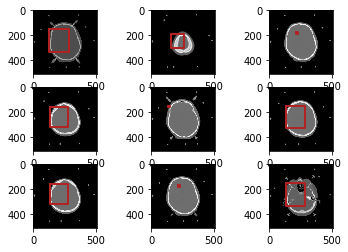

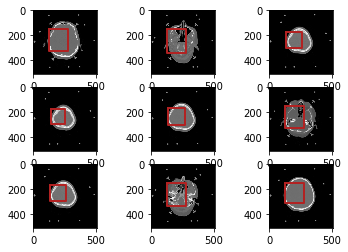

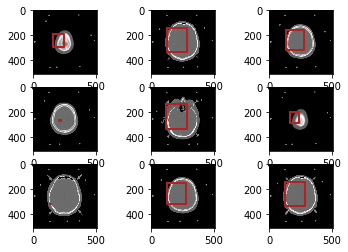

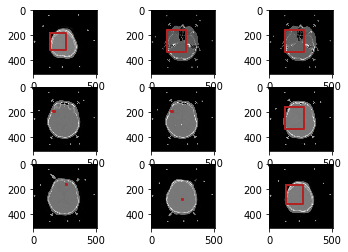

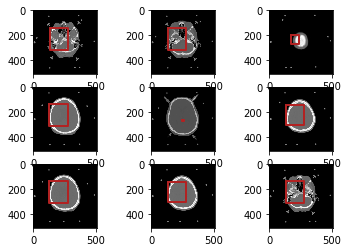

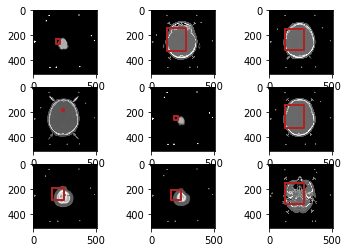

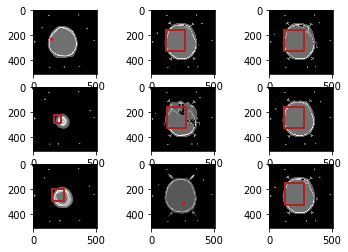

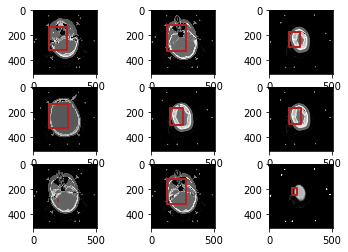

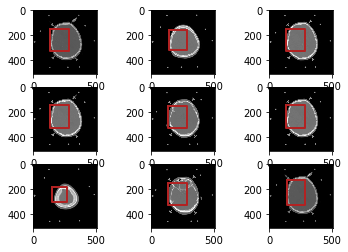

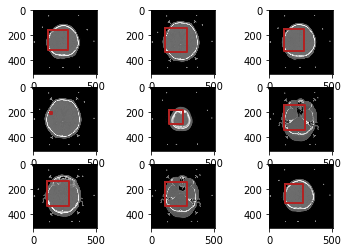

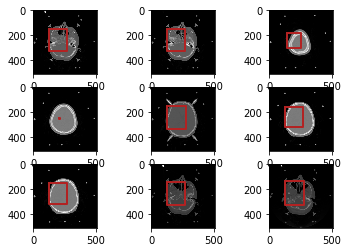

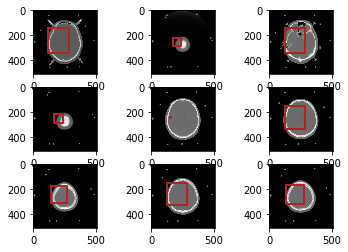

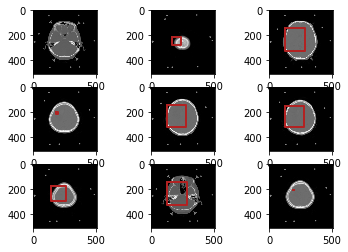

In [5]:
# woopwoop

def generatexy(r, type='ct'):
    x = []
    y = []
    z = []
    num = 0
    for i,item in enumerate(r):
        if num == 0:
            x.append(item)
        if num == 1:
            y.append(item)
        if num == 2:
            z.append(item)
        if num == 2:
            num=0
        else:
            num = num+1
    if type=='ct':
        x = np.asarray(list(map(lambda a: a+206, x)))
        y = np.asarray(list(map(lambda a: a+512, y)))
    else:
        x = np.asarray(list(map(lambda a: a+206, x)))
        y = np.asarray(list(map(lambda a: a+512, y)))
    xlow = np.min(x)
    xhigh = np.max(x)
    ylow = np.min(y)
    yhigh = np.max(y)
    a = [xlow, xhigh, xhigh, xlow, xlow]
    b = [ylow, ylow, yhigh, yhigh, ylow]
    return a,b
def getOtherKey(dick):
    for item in dick.keys():
        if item!='ids':
            return item
    return None
def fetchCTById(it, folder):
    obj = np.load('npy/'+folder+'.npy').item()
    ct = obj['ct']
    if it in ct['ids']:
        ind = ct['ids'].index(it)
        return ct[getOtherKey(ct)][ind], getOtherKey(ct)
    else:
        return None

def getContourLines(filename, type='ct'):
    ds = dicom.read_file(filename)
    total = []
    for item in ds.ROIContourSequence:
        listContourFiles = item.ContourSequence
        aa = map(lambda x: {'xy':generatexy(x.ContourData, type), 'id': x.ContourImageSequence[0].ReferencedSOPInstanceUID}, listContourFiles)
        total = total + list(aa)
    return total

def generateCTImages(dataset='./dataset/'):
    a = os.listdir(dataset)
    a.remove('.DS_Store')
    for folder in a:
        pathfile = dataset+folder+'/RS.'+folder+'.Plan_1.dcm'
        if not os.path.isfile(pathfile):
            pathfile = dataset+folder+'/RS.'+folder+'.Plan_0.dcm'
        if os.path.isfile(pathfile):
            z = getContourLines(pathfile)
            contours = list(map(lambda x: (fetchCTById(x['id'], folder), x['xy']), z))
            f, axarr = plt.subplots(3,3)
            popper = random.sample(contours, 10)
            hip = 0
            item = popper[hip]
            for k in range(3):
                for l in range(3):
                    axarr[k][l].imshow(item[0][0], cmap="gray")
                    axarr[k][l].plot(item[1][0], item[1][1], '-', linewidth=2, color='firebrick')
                    hip=hip+1
                    item = popper[hip]
            f.savefig("images/"+folder+"CT.png")
        else:
            print(pathfile,"Skipping", folder)
#z = getContourLines('./dataset/339663/RS.339663.Plan_1.dcm')
#contours = list(map(lambda x: (fetchCTById(x['id'], '339663'), x['xy']), z))
generateCTImages()

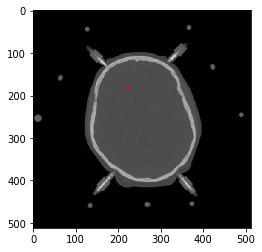

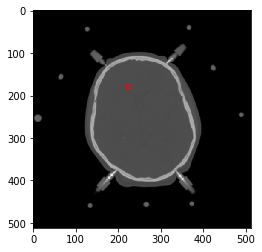

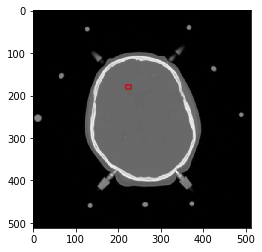

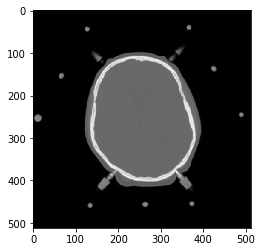

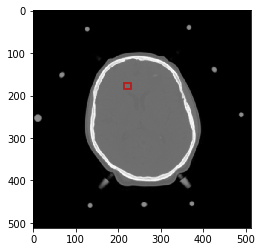

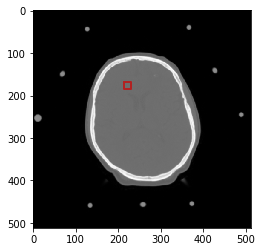

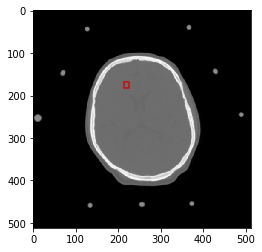

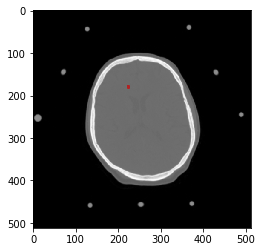

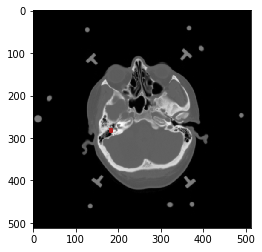

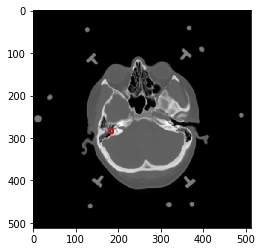

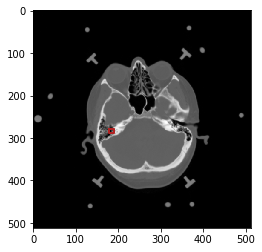

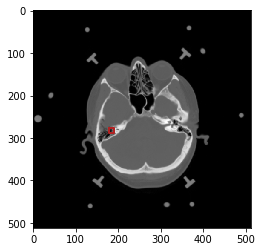

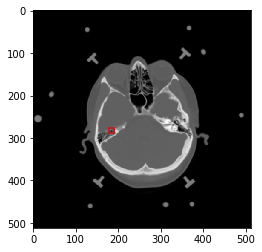

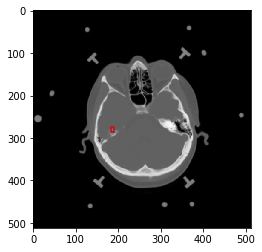

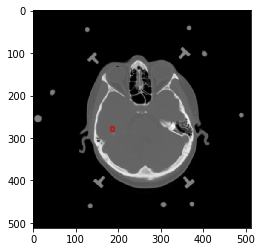

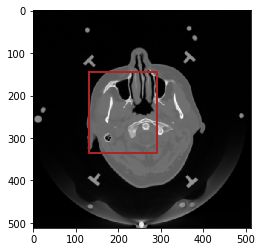

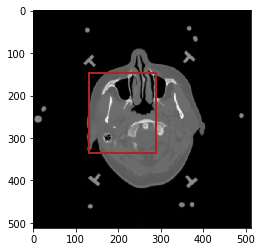

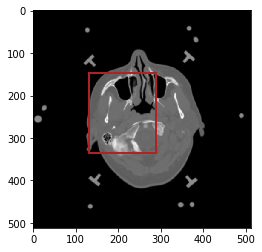

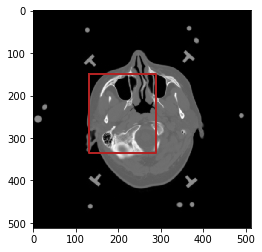

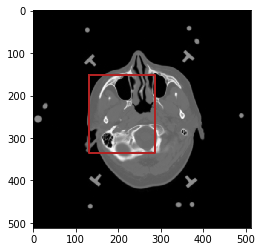

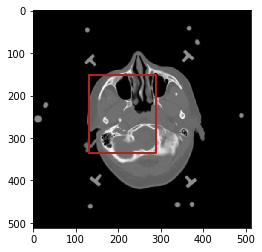

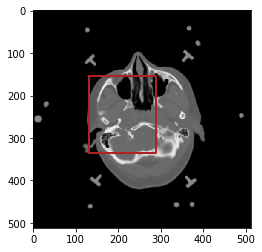

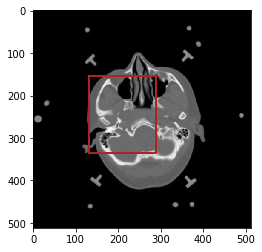

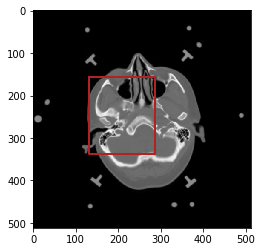

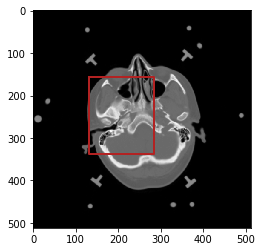

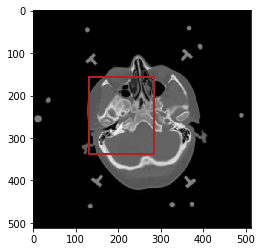

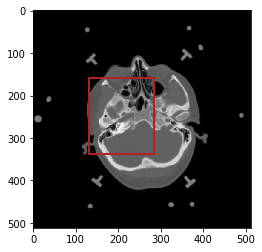

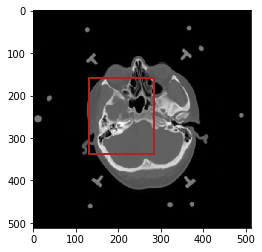

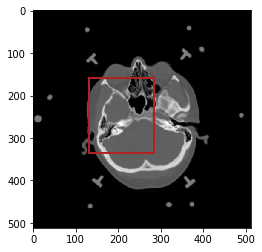

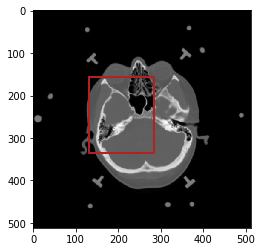

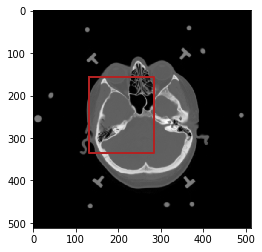

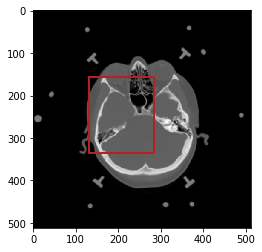

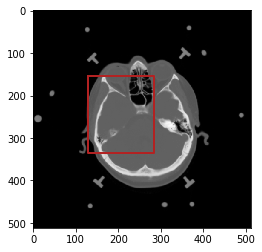

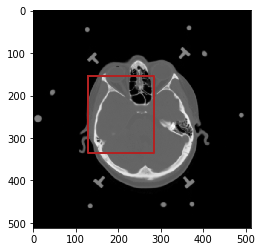

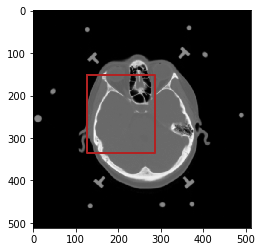

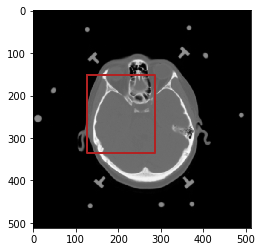

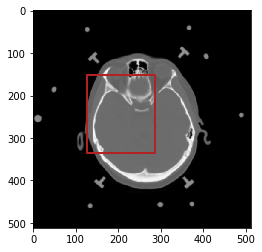

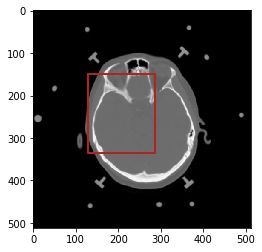

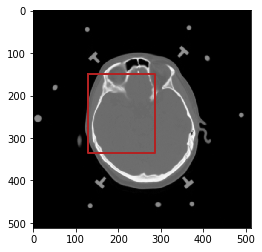

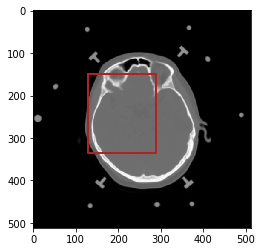

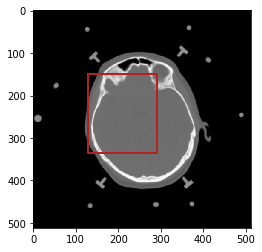

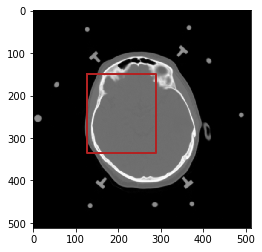

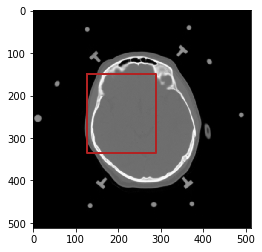

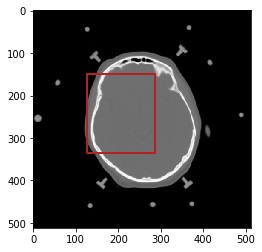

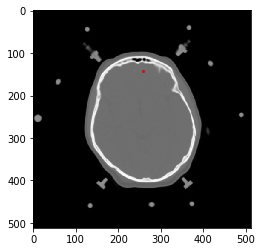

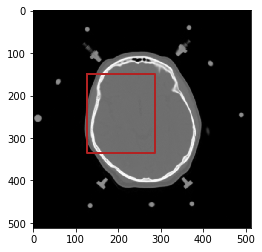

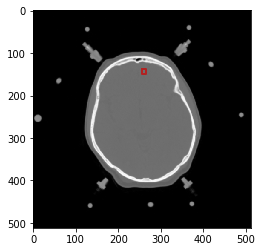

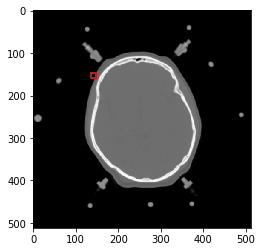

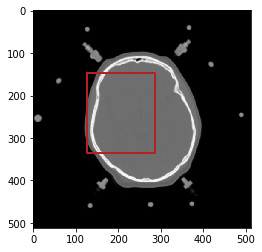

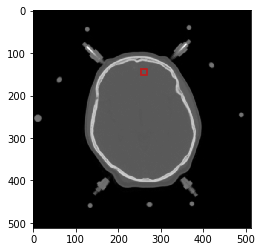

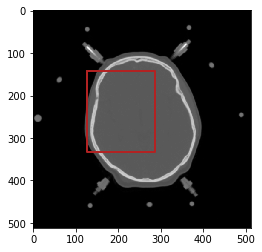

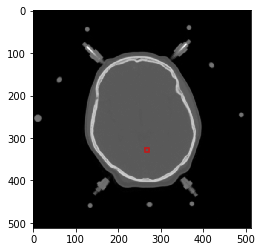

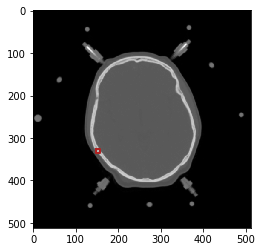

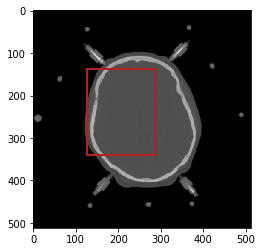

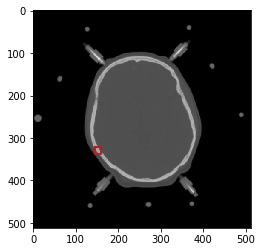

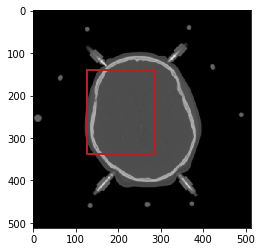

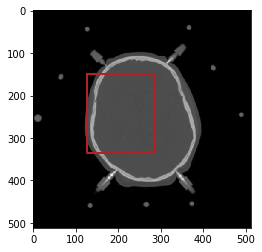

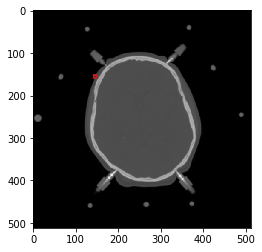

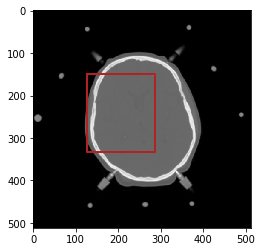

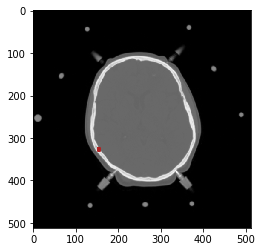

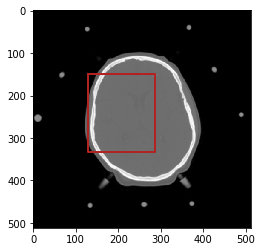

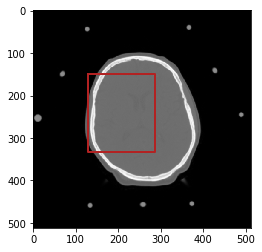

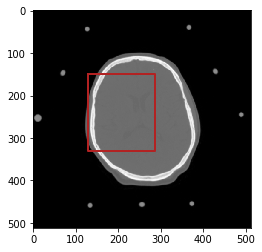

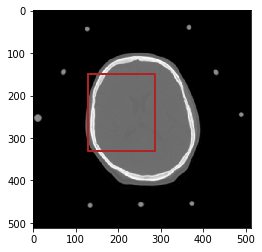

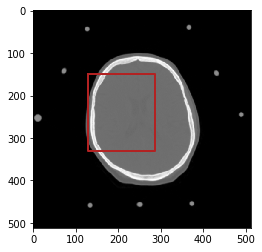

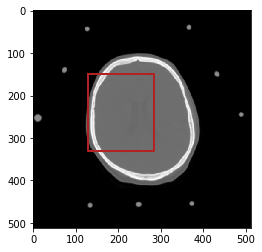

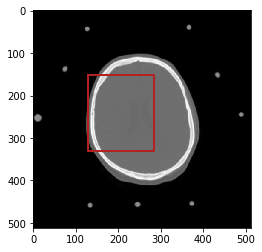

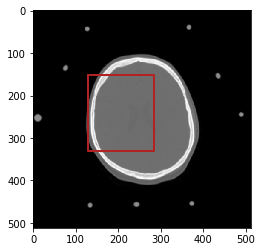

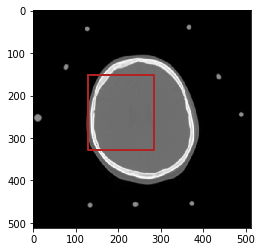

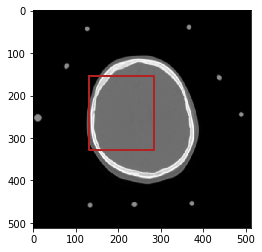

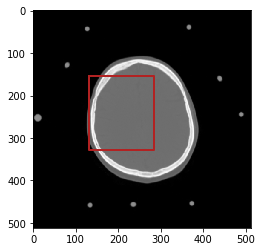

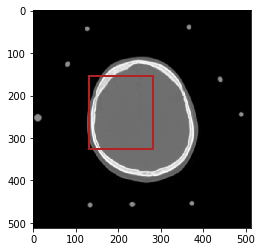

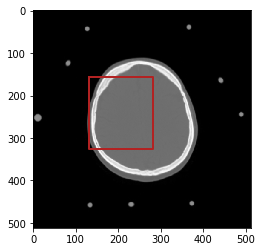

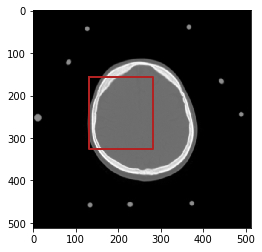

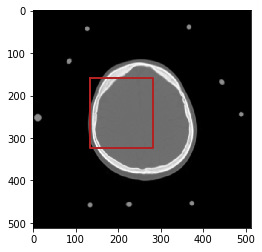

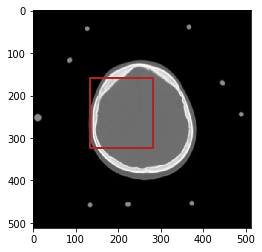

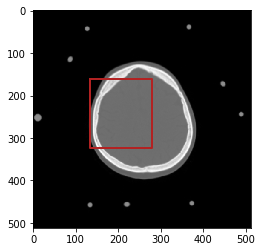

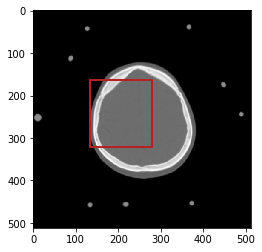

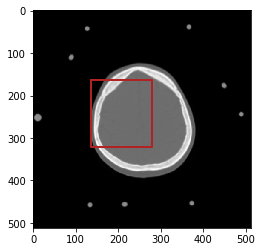

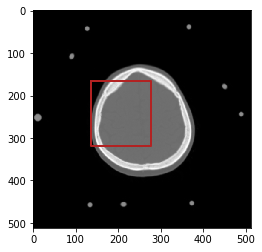

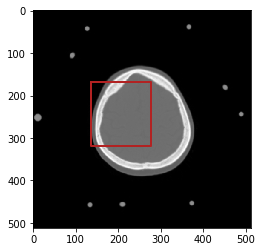

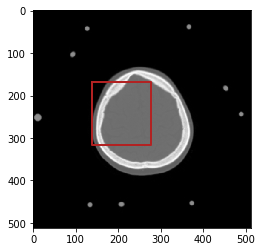

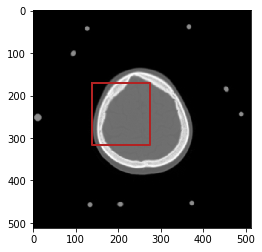

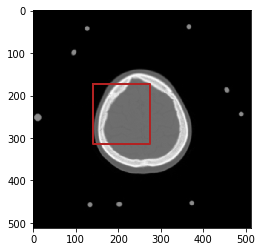

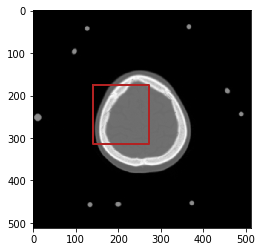

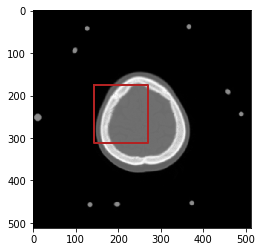

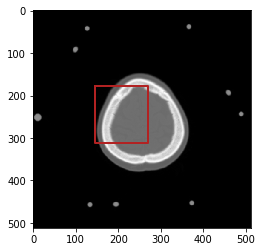

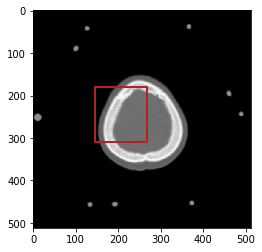

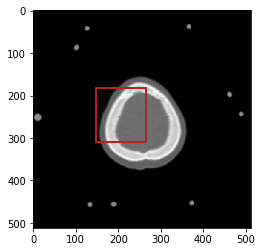

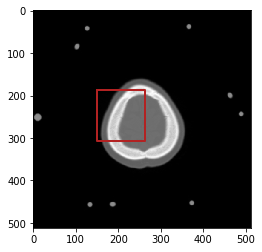

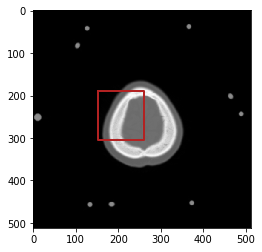

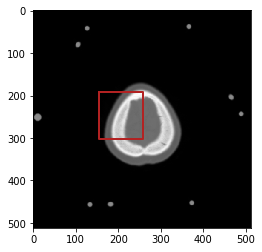

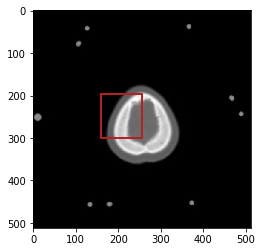

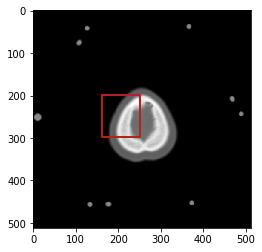

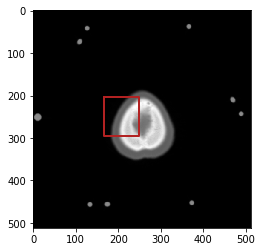

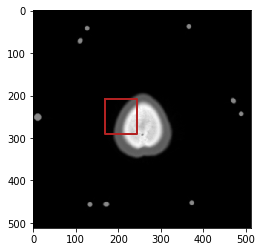

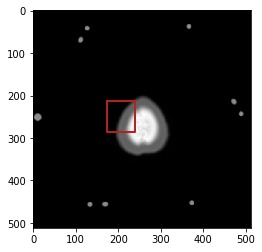

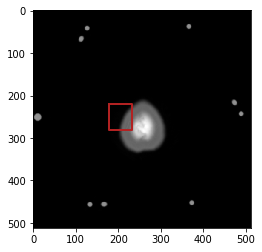

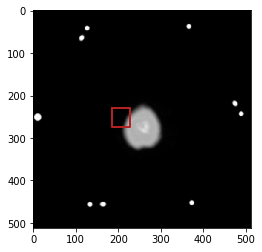

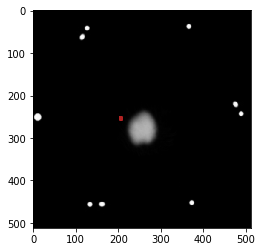

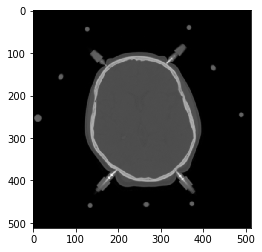

In [260]:
i=0
for j,item in enumerate(contours):
    favindices
    fig, ax = plt.subplots()
    ax.imshow(item[0][0], cmap="gray")
    ax.plot(item[1][0], item[1][1], '-', linewidth=2, color='firebrick')
    i=i+1

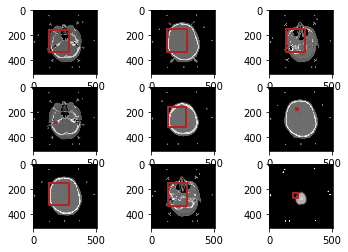

In [262]:
import random
f, axarr = plt.subplots(3,3)
popper = random.sample(contours, 10)
hip = 0
item = popper[hip]
for k in range(3):
    for l in range(3):
        axarr[k][l].imshow(item[0][0], cmap="gray")
        axarr[k][l].plot(item[1][0], item[1][1], '-', linewidth=2, color='firebrick')
        hip=hip+1
        item = popper[hip]
f.savefig("images/339663CT2.png")

In [146]:
sss = '1.3.12.2.1107.5.1.4.65763.30000017060106552373900001373'

In [110]:
type(["bb"])

list

./dataset/351423/RS.351423.MR_1.dcm Skipping 351423


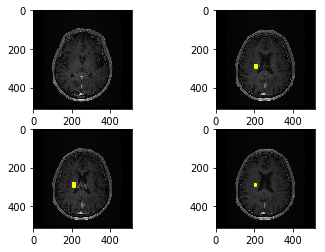

In [15]:
def fetchMRById(it, folder):
    obj = np.load('npy/'+folder+'.npy').item()
    mr = obj['mr']
    if it in mr['ids']:
        ind = mr['ids'].index(it)
        return mr[getOtherKey(mr)][ind], getOtherKey(mr)
    else:
        return (None,None)

def generateMRImages(dataset='./dataset/'):
    a = os.listdir(dataset)
    a.remove('.DS_Store')
    a = ['351423', '361113']
    for folder in a:
        pathfile = dataset+folder+'/RS.'+folder+'.MR_1.dcm'
        if os.path.isfile(pathfile):
            z = getContourLines(pathfile, 'mr')
            contours = list(map(lambda x: (fetchMRById(x['id'], folder), x['xy']), z))
            f, axarr = plt.subplots(2,2)
            if len(contours) >= 5:
                popper = random.sample(contours, 5)
                hip = 0
                item = popper[hip]
                for k in range(2):
                    for l in range(2):
                        axarr[k][l].imshow(item[0][0], cmap="gray")
                        axarr[k][l].plot(item[1][0], item[1][1], '-', linewidth=2, color='yellow')
                        hip=hip+1
                        item = popper[hip]
                f.savefig("images/"+folder+"MR.png")
            else:
                print('Only', len(contours), " MR contours found for", folder)
        else:
            print(pathfile,"Skipping", folder)

def generatexy(r, type='ct'):
    x = []
    y = []
    z = []
    num = 0
    for i,item in enumerate(r):
        if num == 0:
            x.append(item)
        if num == 1:
            y.append(item)
        if num == 2:
            z.append(item)
        if num == 2:
            num=0
        else:
            num = num+1
    if type=='ct':
        x = np.asarray(list(map(lambda a: a+206, x)))
        y = np.asarray(list(map(lambda a: a+512, y)))
    else:
        x = np.asarray(list(map(lambda a: a+206, x)))
        y = np.asarray(list(map(lambda a: a+206, y)))
    xlow = np.min(x)
    xhigh = np.max(x)
    ylow = np.min(y)
    yhigh = np.max(y)
    a = [xlow, xhigh, xhigh, xlow, xlow]
    b = [ylow, ylow, yhigh, yhigh, ylow]
    return a,b
def getContourLines(filename, type='ct'):
    ds = dicom.read_file(filename)
    total = []
    for item in ds.ROIContourSequence:
        listContourFiles = item.ContourSequence
        aa = map(lambda x: {'xy':generatexy(x.ContourData, type), 'id': x.ContourImageSequence[0].ReferencedSOPInstanceUID}, listContourFiles)
        total = total + list(aa)
    return total
generateMRImages()

In [17]:
z = os.listdir("images/")
z.remove('.DS_Store')
z

['339663CT.png',
 '339663MR.png',
 '345923CT.png',
 '345923MR.png',
 '346231CT.png',
 '346231MR.png',
 '351423CT.png',
 '353891CT.png',
 '353891MR.png',
 '354152CT.png',
 '354152MR.png',
 '361113CT.png',
 '361113MR.png',
 '362946CT.png',
 '362946MR.png',
 '363740CT.png',
 '363740MR.png',
 '386348CT.png',
 '386661CT.png',
 '386661MR.png',
 '386662CT.png',
 '386800CT.png',
 '386800MR.png',
 '386801CT.png',
 '386801MR.png']